# PCA

In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets, metrics
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
import numpy as np
import math
from sklearn.decomposition import PCA



In [4]:
# loading the data
df = pd.read_csv('Data/Hotel Reservations.csv')
df.info()

FileNotFoundError: [Errno 2] No such file or directory: 'Data/Hotel Reservations.csv'

In [27]:
# drop the response variable
df.drop(['Booking_ID', 'booking_status'], axis=1, inplace=True)
dropping = []
for col in df:
    if df[col].dtypes == "object":
        dropping.append(col)
dropping

['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']

In [28]:
df= df.drop(dropping,axis=1)
df = pd.get_dummies(df)

In [34]:
# standardlize the dataframe
df_std  = (df - df.mean()) / (df.std())
df_std = df - df.mean()
df_std
# df_std.to_csv("full_dat.csv")

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,0.155038,-0.105279,0.189276,-0.2043,-0.030986,138.767443,-0.820427,2.576347,-13.596995,-0.025637,-0.023349,-0.153411,-38.423539,-0.619655
1,0.155038,-0.105279,1.189276,0.7957,-0.030986,-80.232557,0.179573,3.576347,-9.596995,-0.025637,-0.023349,-0.153411,3.256461,0.380345
2,-0.844962,-0.105279,1.189276,-1.2043,-0.030986,-84.232557,0.179573,-5.423653,12.403005,-0.025637,-0.023349,-0.153411,-43.423539,-0.619655
3,0.155038,-0.105279,-0.810724,-0.2043,-0.030986,125.767443,0.179573,-2.423653,4.403005,-0.025637,-0.023349,-0.153411,-3.423539,-0.619655
4,0.155038,-0.105279,0.189276,-1.2043,-0.030986,-37.232557,0.179573,-3.423653,-4.596995,-0.025637,-0.023349,-0.153411,-8.923539,-0.619655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,1.155038,-0.105279,1.189276,3.7957,-0.030986,-0.232557,0.179573,0.576347,-12.596995,-0.025637,-0.023349,-0.153411,64.376461,0.380345
36271,0.155038,-0.105279,0.189276,0.7957,-0.030986,142.767443,0.179573,2.576347,1.403005,-0.025637,-0.023349,-0.153411,-12.473539,1.380345
36272,0.155038,-0.105279,1.189276,3.7957,-0.030986,62.767443,0.179573,-0.423653,-14.596995,-0.025637,-0.023349,-0.153411,-5.033539,1.380345
36273,0.155038,-0.105279,-0.810724,0.7957,-0.030986,-22.232557,0.179573,-3.423653,5.403005,-0.025637,-0.023349,-0.153411,-8.923539,-0.619655


In [35]:
# run PCA
n_components = 10
pca = PCA(n_components=n_components)
pca_fit = pca.fit_transform(df_std)
df_pca = pd.DataFrame(data = pca_fit
                      , columns = ['PC '+ str(i+1) for i in range(n_components)])

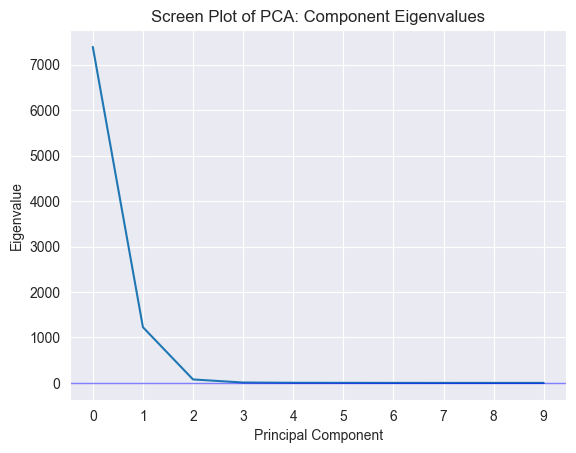

In [36]:
# check the Screen plot
ax = plt.figure().gca()
ax.plot(pca.explained_variance_)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, linewidth=1, color='b', alpha=0.5)
plt.title('Screen Plot of PCA: Component Eigenvalues')
plt.show()

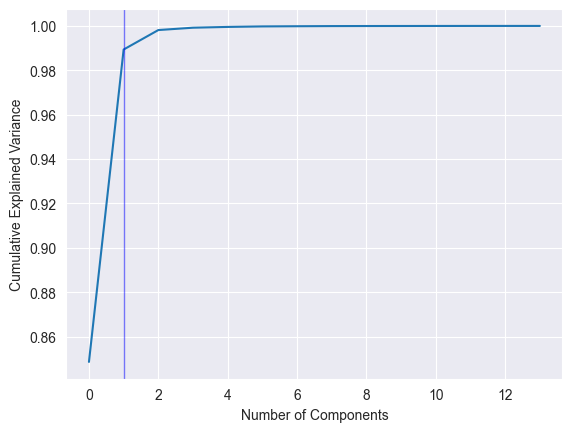

In [37]:
# check the variance explained from PCA
ax = plt.figure().gca()
pca = PCA().fit(df_std)
ax.plot(np.cumsum(pca.explained_variance_ratio_))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.axvline(x=1, linewidth=1, color='b', alpha=0.5)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [38]:
# check the loading for PCA elements
loadings = pca.components_
results = pd.DataFrame(loadings)
results.index=df.columns
print(results[0].sort_values(ascending=True))

arrival_date                           -0.944745
no_of_previous_cancellations           -0.077009
no_of_special_requests                 -0.028567
required_car_parking_space             -0.026062
no_of_previous_bookings_not_canceled   -0.012734
no_of_adults                            0.000564
no_of_weekend_nights                    0.001182
no_of_week_nights                       0.001534
avg_price_per_room                      0.004463
no_of_children                          0.004517
lead_time                               0.036498
arrival_year                            0.093743
arrival_month                           0.132405
repeated_guest                          0.268653
Name: 0, dtype: float64


In [39]:
# run PCA with 1 component
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca.fit(df_std)
x_pca = pca.transform(df_std)



In [40]:
# output the csv file
x_pca_df = pd.DataFrame(x_pca)
x_pca_df.to_csv("PCA_dat.csv")